# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

pd.set_option('display.max_columns', 250)


In [2]:
df = pd.read_csv('../data/clean_final.csv')

In [3]:
df.head()

,index,Id,CreationDate,Title,Body,Tags,ViewCount,AnswerCount,CommentCount,target_tags,overlap_tags,target_class,body_clean
0,1,53992219,2019-01-01 00:01:55,How to programmatically change style sheet of ...,<p>I have so many buttons on a dialog and I wa...,"['c++', 'qt', 'qt5', 'qtstylesheets', 'qpushbu...",775,2,2,{'c++'},c++,4,i have so many buttons on a dialog and i want ...
1,4,53992223,2019-01-01 00:02:37,Unable to print a class list attribute using i...,<p>I am designing a deck class that has <stron...,"['python', 'python-3.x', 'list', 'class', 'pri...",40,2,0,"{'python-3.x', 'python'}",python-3.x python,5,i am designing a deck class that has init meth...
2,8,53992234,2019-01-01 00:05:48,How to rearrange subplots so that one is under...,<p>I am trying to code two plots such that one...,"['python', 'matplotlib', 'subplot']",519,1,1,{'python'},python,5,i am trying to code two plots such that one pl...
3,10,53992248,2019-01-01 00:09:24,Function always returns 1,<p>I´m trying to write a simple branch predict...,"['c++', 'function']",150,1,21,{'c++'},c++,4,i m trying to write a simple branch predictor ...
4,11,53992252,2019-01-01 00:11:20,possible to speed up this query?,<p>I have the following query which takes a li...,"['sql', 'postgresql']",40,1,0,{'sql'},sql,0,i have the following query which takes a littl...


In [4]:
# Drop random and unnecesary'index' labeled column 
df = df.drop(['index'], axis = 1)

In [5]:
df.head()

,Id,CreationDate,Title,Body,Tags,ViewCount,AnswerCount,CommentCount,target_tags,overlap_tags,target_class,body_clean
0,53992219,2019-01-01 00:01:55,How to programmatically change style sheet of ...,<p>I have so many buttons on a dialog and I wa...,"['c++', 'qt', 'qt5', 'qtstylesheets', 'qpushbu...",775,2,2,{'c++'},c++,4,i have so many buttons on a dialog and i want ...
1,53992223,2019-01-01 00:02:37,Unable to print a class list attribute using i...,<p>I am designing a deck class that has <stron...,"['python', 'python-3.x', 'list', 'class', 'pri...",40,2,0,"{'python-3.x', 'python'}",python-3.x python,5,i am designing a deck class that has init meth...
2,53992234,2019-01-01 00:05:48,How to rearrange subplots so that one is under...,<p>I am trying to code two plots such that one...,"['python', 'matplotlib', 'subplot']",519,1,1,{'python'},python,5,i am trying to code two plots such that one pl...
3,53992248,2019-01-01 00:09:24,Function always returns 1,<p>I´m trying to write a simple branch predict...,"['c++', 'function']",150,1,21,{'c++'},c++,4,i m trying to write a simple branch predictor ...
4,53992252,2019-01-01 00:11:20,possible to speed up this query?,<p>I have the following query which takes a li...,"['sql', 'postgresql']",40,1,0,{'sql'},sql,0,i have the following query which takes a littl...


In [6]:
df['CreationDate']= pd.to_datetime(df['CreationDate'])

In [7]:
# Check for nulls 
df.isnull().sum()

Id              0
CreationDate    0
Title           0
Body            0
Tags            0
ViewCount       0
AnswerCount     0
CommentCount    0
target_tags     0
overlap_tags    0
target_class    0
body_clean      1
dtype: int64

In [8]:
df[df['body_clean'].isnull()]

,Id,CreationDate,Title,Body,Tags,ViewCount,AnswerCount,CommentCount,target_tags,overlap_tags,target_class,body_clean
91170,55234780,2019-03-19 06:21:07,1st data is officeIn and 2nd data is OfficeOut...,"<p><a href=""https://i.stack.imgur.com/P3SNS.pn...","['mysql', 'sql']",26,1,0,"{'sql', 'mysql'}",sql mysql,0,NaN


In [9]:
df.loc[91170, 'Body']

'<p><a href="https://i.stack.imgur.com/P3SNS.png" rel="nofollow noreferrer"><img src="https://i.stack.imgur.com/P3SNS.png" alt="enter image description here"></a></p>\n\n<pre><code>1476    5   2019-03-18 09:35:06.000\n1487    5   2019-03-18 13:19:53.000\n1488    5   2019-03-18 13:37:40.000\n1495    5   2019-03-18 15:09:38.000\n1497    5   2019-03-18 15:18:26.000\n1503    5   2019-03-18 17:34:46.000\n1504    5   2019-03-18 17:48:23.000\n1511    5   2019-03-18 19:14:51.000\n</code></pre>\n'

In [10]:
# drop row with any missing value
df = df.dropna()

In [11]:
df.isnull().sum()

Id              0
CreationDate    0
Title           0
Body            0
Tags            0
ViewCount       0
AnswerCount     0
CommentCount    0
target_tags     0
overlap_tags    0
target_class    0
body_clean      0
dtype: int64

# Exploratory Data Analysis (EDA)

- ngram bar graphs (most & least used words, bigrams)
    - Most used in python, sql etc 
- if word appears in more than 80%
    - vectorizer parameters
        - max_df()
- create % weekly graph showing frequency of questions for each language (use datetime and index )
- average length of words in question 


## One

In [ ]:
# can't put creatingdate as index, which makes sense... 
df['CreationDate'].nunique()

In [ ]:
df.shape

In [ ]:
df2 = df

In [ ]:
(df2)

In [ ]:
def check_length(df, col):
    '''
    function to create seperate column in dataframe that says how many words are in 
    each Stack Overflow question 
    '''
    for i in range(len(df)):
        length_{i} = len(df.loc[{i},{col}])
        return df

In [ ]:
len(df)

In [ ]:
check_length(df2, 'body_clean')

In [ ]:
df['body_length'] = df['body_clean'].map(lambda x: len(df.loc[x,'body_clean']))

In [ ]:
len(df.loc[1,'body_clean'])

In [ ]:
df2['cbody_length'] = df2['body_clean'].map(lambda i: len(df2.loc[i,'body_clean']) for i in range(len(df2)))

In [12]:
# Length of question for index position 1 
len(df.loc[1,'body_clean'])

1200

### Most Frequent Words (ALL) 

In [12]:
X = df['body_clean']
y = df['target_class']

In [13]:
cvec = CountVectorizer(stop_words='english', 
                       max_features = 500,    # Top 500 words used
                       ngram_range = (1,1))    #can try bi-grams next 
#                        max_df = 0.9,  # max_df of 0.9 will ignore words that occur in over 90% of your corpus.
#                        min_df = 10   # min_df of 0.1 will ignore words that occur in less than 10% of your corpus

# Sparse Matrix
sparse_cv = cvec.fit_transform(X)

In [14]:
# CVEC Dataframe
cvec_df = pd.DataFrame(sparse_cv.toarray(), columns=cvec.get_feature_names())

In [15]:
cvec_df.head()

,abc,able,access,account,action,add,added,address,advance,age,anaconda,answer,apache,api,app,appdata,append,application,apply,appreciated,args,argument,array,attribute,auto,ax,axis,bar,base,based,batch,begin,best,bin,bit,block,body,boost,break,build,button,called,case,category,change,char,character,check,class,classes,click,client,close,code,col,color,column,columns,com,command,compile,config,conn,connect,connection,console,const,contains,content,context,conv,convert,copy,core,correct,count,cout,cpp,create,created,creating,csv,current,currently,cursor,customer,cv,data,database,dataframe,dataset,date,datetime,day,days,db,debug,def,default,define,defined,delete,description,device,df,dict,dictionary,did,different,dir,directory,display,div,django,document,does,doesn,doing,don,double,driver,dt,dtype,echo,edit,...,screen,script,search,second,select,self,send,series,server,service,session,set,setup,shape,similar,simple,single,site,size,socket,solution,solve,sort,source,span,spark,specific,split,sql,src,start,state,statement,static,status,std,step,store,str,string,struct,structure,style,sub,sum,sure,sys,table,tables,tag,target,task,td,temp,template,tensorflow,test,text,tf,th,thank,thanks,think,thread,time,times,timestamp,title,tk,token,total,tr,traceback,train,training,tried,true,try,trying,txt,type,ui,understand,unique,update,url,use,used,user,username,users,using,usr,utf,val,value,values,var,varchar,variable,variables,ve,vector,version,view,void,want,warning,way,web,width,win,window,windows,word,words,work,working,works,write,wrong,www,xml,year,yes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,3,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,3,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,1,0,2,0,0,0,0,0,0,0,1,0,3,1,2,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,3,0,0,0,0,0,0,0,0,

In [16]:
max(cvec_df.sum())

547115

In [17]:
sum_words = cvec_df.sum(axis=0) 

In [37]:
# How do I add an index to this data frame? I looked at index = but I couldn't get it to work and 
# I looked at the documentation 

top_words = pd.DataFrame(sum_words.sort_values(ascending = False), columns = ['count'])

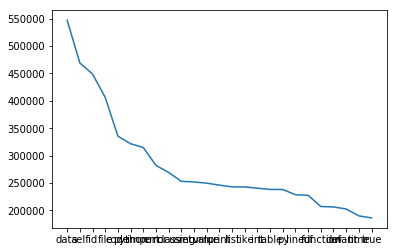

In [43]:
plt.plot(top_words.iloc[0:25,:]);

In [61]:
top15 = top_words.iloc[0:15,:]

In [70]:
top15 = top15.reset_index()

In [71]:
top15

,index,count
0,data,547115
1,self,469186
2,id,449011
3,file,406416
4,code,335646
5,python,321767
6,import,314989
7,error,282213
8,class,269461
9,using,253231


In [73]:
plt.figure(figsize=(18,9))
plt.bar(y = top15['index'], x = top15['count'])
plt.title('Top 15 Words', fontsize=26)
plt.xlabel('Frequency', fontsize=20);


# top15.plot(kind = 'barh');

# figsize=(20, 8)
# plt.title("Top 15 Words")
# plt.xlabel('Frequency');

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1296x648 with 0 Axes>

##  Function 

In [107]:
def freq_words(df):
    '''
    function that takes in dataframe:
        - splits into X, y 
        - creates CountVectorizer instance 
        - takes sparse matrix --> dataframe (sum of total times certain word used)
        - returns the above dataframe 
    
    '''
    X = df['body_clean']
    y = df['target_class']
    
    cvec = CountVectorizer(stop_words='english', 
                           max_features = 100,   
                           ngram_range = (1,1))    #can try bi-grams next 

    # Sparse Matrix
    sparse_cv = cvec.fit_transform(X)

    # Sparse matrix --> Dataframe
    cvec_df = pd.DataFrame(sparse_cv.toarray(), columns=cvec.get_feature_names())

    # Total times word was used 
    sum_words = cvec_df.sum(axis=0) 
    
    # Dataframe 
    top_words = pd.DataFrame(sum_words.sort_values(ascending = False), columns = ['count'])
    
    # Reset index
    top_words = top_words.reset_index()
    
    # Change Column name from index --> word 
    top_words = top_words.rename(columns={'index': 'word'})
    
    return top_words

In [103]:
total_frequency = freq_words(df)

In [106]:
total_frequency[0:25]

,word,count
0,data,547115
1,self,469186
2,id,449011
3,file,406416
4,code,335646
5,python,321767
6,import,314989
7,error,282213
8,class,269461
9,using,253231


### Most Frequent Words: SQL

In [91]:
sql_df = df[df['target_class'] == 0]

In [93]:
sql_frequency = freq_words(sql_df)

In [108]:
sql_frequency[0:25]

,count
id,263760
table,170432
select,129408
data,98185
query,97987
null,94952
date,86940
sql,84863
user,69161
database,67490


### Most Frequent Words: Scala

In [109]:
scala_df = df[df['target_class'] == 1]

In [110]:
scala_frequency = freq_words(scala_df)

In [112]:
scala_frequency[0:25]

,word,count
0,scala,28407
1,val,17905
2,spark,17613
3,org,15901
4,string,13671
5,java,12935
6,apache,12203
7,error,9670
8,class,8161
9,case,7566


### Most Frequent Words: R

In [85]:
r_df = df[df['target_class'] == 2]

In [111]:
r_frequency = freq_words(r_df)

In [113]:
r_frequency[0:25]

,word,count
0,data,126947
1,na,98776
2,df,58318
3,function,40924
4,list,39319
5,frame,34724
6,like,33810
7,code,31247
8,library,31181
9,id,29291


### Most Frequent Words: Julia

In [118]:
julia_df = df[df['target_class'] == 3]

In [119]:
julia_frequency = freq_words(julia_df)
julia_frequency[0:25]

,word,count
0,julia,2973
1,jl,1860
2,end,1708
3,function,1417
4,array,1390
5,int,1257
6,using,1103
7,error,950
8,float,945
9,code,782


### Most Frequent Words: C++

In [120]:
cplus_df = df[df['target_class'] == 4]

In [121]:
cplus_frequency = freq_words(cplus_df)
cplus_frequency[0:25]

,word,count
0,int,139511
1,std,122450
2,include,66846
3,return,53243
4,cout,52398
5,void,49041
6,const,48961
7,string,48576
8,class,47660
9,code,45217


### Most Frequent Words: Python

In [125]:
python_df = df[df['target_class'] == 5]

In [ ]:
python_frequency = freq_words(python_df)
python_frequency[0:25]

## Two 